# Filtros de Respuesta al Impulso Finita (FIR)
## 1. Respuesta al impulso del filtro ideal

La respuesta en frecuencia de un filtro pasa bajas ideal se define como

 $$ H(\omega) = \left\{\begin{matrix}
     A &:& -\omega_c<x<\omega_c\\
     0&:& \mbox{otro caso}
  \end{matrix} \right .$$

 Función de respuesta al impulso del filtro ideal es
 
 $$ h(t) = sinc(x) = \left\{\begin{matrix}
     2A\dfrac{sin(\omega_ct)}{\omega_c}&:& \omega_c\neq0 \\
     2A&:& \omega_c=0
  \end{matrix} \right .$$

In [1]:
#NOTE importar bibliotecas
import numpy             as np
import matplotlib.pyplot as plt

from scipy import signal

In [59]:
# Definicion de funcion para graficar respuesta en frecuencia del filtro
def freqz_plot(b,a,sr):
    w, h = signal.freqz(b,a)
    h[h==0] = 1E-5
    
    H    = 20*np.log10( np.abs(h) )
    W    = np.angle  (h)
    W    = np.unwrap (W)
    W    = np.degrees(W)
    w    = np.linspace(0,sr/2,H.shape[0] )
    
    return w, W, H

In [192]:
def sinc(A, wc, t):
    s = np.ones(t.shape)
    s[t!=0.] = 2*A*np.sin( wc*t[t!=0] )/( t[t!=0] )
    s[t==0.] = 2*A*wc
    
    return s

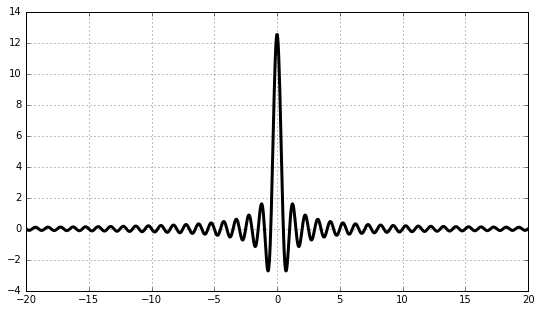

In [205]:
t   = np.linspace(-20,20,1000)
A   = 1.
wc  = 1*(2*np.pi)
htn = sinc(A,wc,t)

plt.figure(figsize=(9,5))
plt.plot(t,htn,'k',linewidth=3)
plt.grid(True)
plt.show()

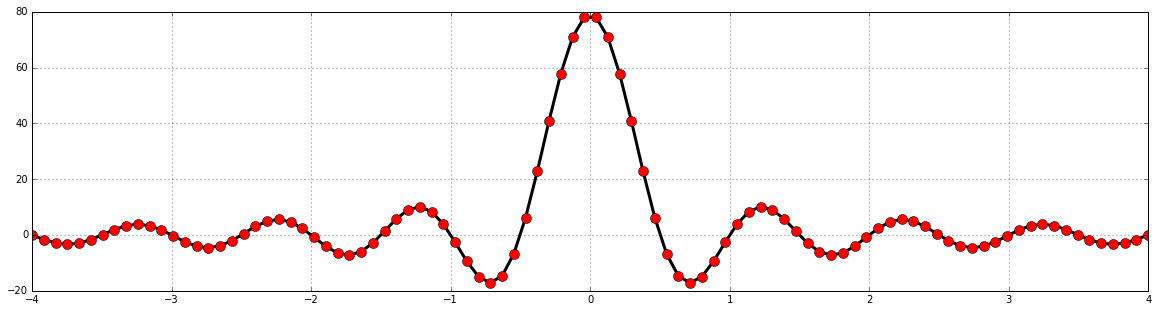

In [211]:
sr = 12.
a  = 4
A  = wc

t = np.linspace(-a,a,int(2*a*sr) )
htn = sinc(A,wc,t)

plt.figure(figsize=(20,5))
plt.plot(t,htn,'k' ,linewidth=3)
plt.plot(t,htn,'or',linewidth=3,markersize=10)
plt.grid(True)
plt.show()


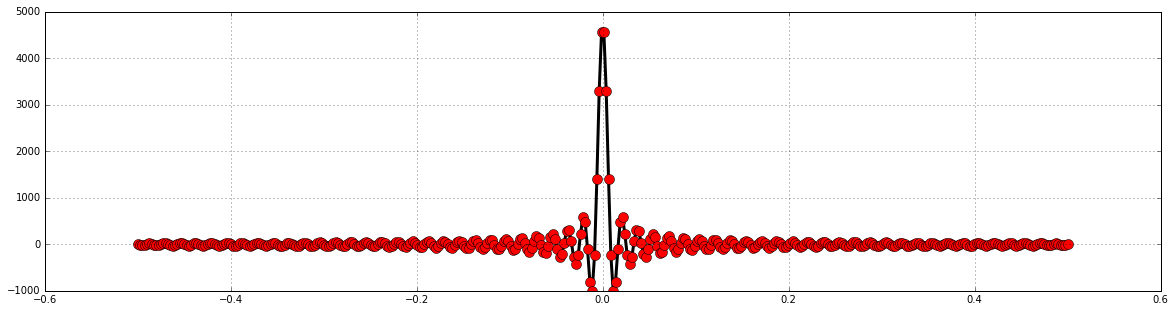

In [225]:
sr = 400.
a  = .5
#A  = 0.001

N  = 22
M  = N+1

t = np.linspace(-a,a,int(2*a*sr) )
htn = sinc(A,wc,t)

plt.figure(figsize=(20,5))
plt.plot(t,htn,'k' ,linewidth=3)
plt.plot(t,htn,'or',linewidth=3,markersize=10)
plt.grid(True)
plt.show()


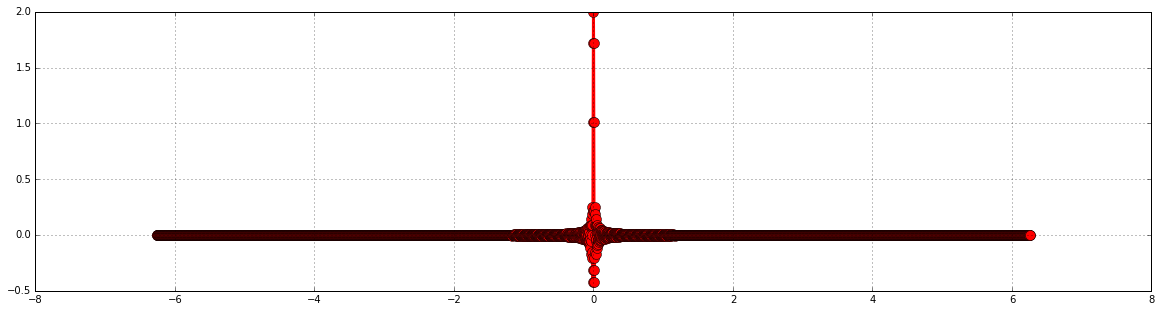

In [246]:
N  = 5005
M  = N+1
wc = 60*2*np.pi

m   = np.arange(M) - M/2
htn = sinc(1/wc,wc,m/sr)

plt.figure(figsize=(20,5))
#plt.plot(t,htn,'k' ,linewidth=3)
plt.plot(m/sr,htn,'-or',linewidth=3,markersize=10)
plt.grid(True)
plt.show()

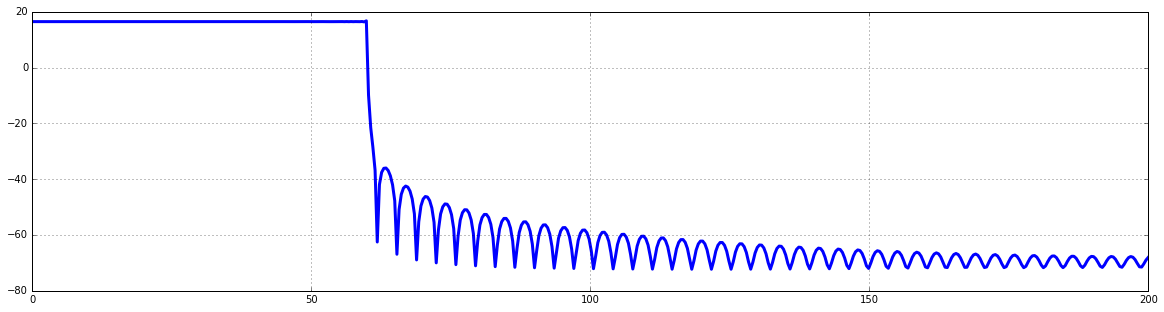

In [247]:
w, W, H, = freqz_plot(htn,[1.],sr)

plt.figure(figsize=(20,5))
plt.plot(w,H,'b',linewidth=3)
plt.grid(True)
plt.show()

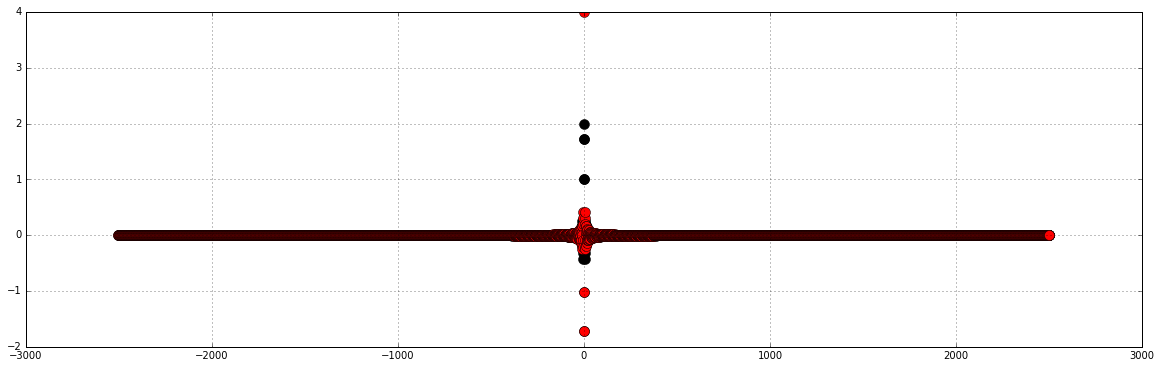

In [248]:
htna         =  htn.copy()
htna[ m!=0 ] = -htn[ m!=0 ]
htna[ m==0 ] = 2*htn[ m==0 ]


plt.figure(figsize=(20,6))
#plt.plot(t,htn,'k' ,linewidth=3)
plt.plot(m,htn ,'ok',linewidth=3,markersize=10)
plt.plot(m,htna,'or',linewidth=3,markersize=10)
plt.grid(True)
plt.show()

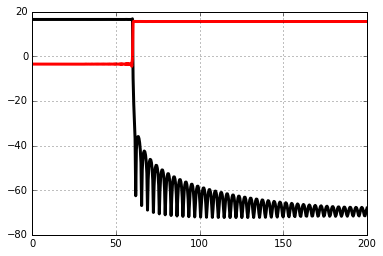

In [249]:
w, W, H, = freqz_plot(htn,[1.],sr)
plt.plot(w,H,'k',linewidth=3)

w, W, H, = freqz_plot(htna,[1.],sr)
plt.plot(w,H,'r',linewidth=3)

plt.grid(True)
plt.show()

 Función de respuesta al impulso del filtro ideal es
 
 $$ h(t) = sinc(x) = \left\{\begin{matrix}
     A\dfrac{sin(\alpha x)}{\beta x}&:& x\neq0 \\
     B&:& x=0
  \end{matrix} \right .$$
 
 de tal forma que $h(t): \mathbb{R}\rightarrow [-1,1]$ y no causal
 
 $\therefore$ No se puede implementar físicamente

## 2. Respuesta al impulso finita
Para que la respuesta al impulsos sea finita se requiere recortar la respuesta al impulso (función *sinc*) a un intervalo finito $[-a,a]$

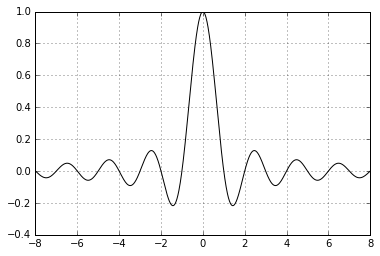

In [8]:
p  = 1000 #numero de puntos, unicamente para graficar
a  = 8.
t  = np.linspace(-a,a,p)
ht = sinc(alpha,beta,A,t)

plt.plot( t, ht,'k' )
plt.grid(True)
plt.show()

Para que la respuesta al impulso finita sea causal hay que definir una nueva función $\hat{h}=h(t-a)$

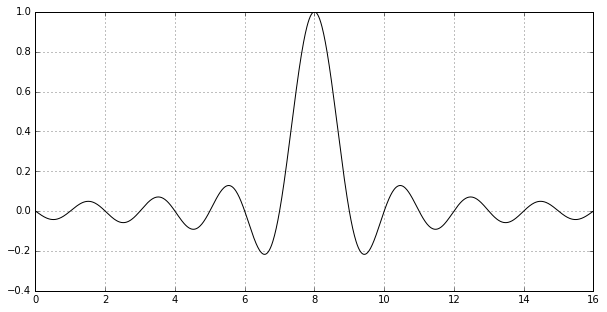

In [9]:
t   = np.linspace(-a,a,p)
t   = t+a
hht = sinc( alpha,beta,A,t-a )

plt.figure(figsize=(10,5))
plt.plot( t, hht,'k' )
plt.grid(True)
plt.show()

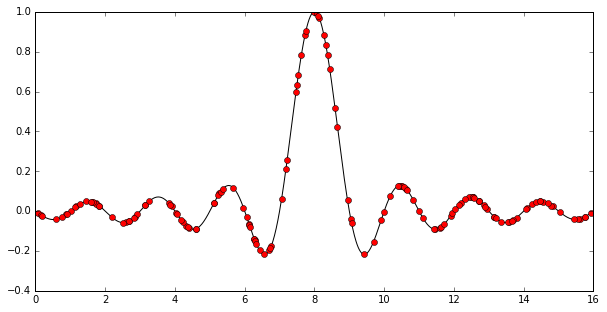

In [10]:
dt  = np.random.uniform( 0,2*a,int(.15*p) )
dt  = dt
hdt = sinc( alpha,beta,A,dt-a )

plt.figure(figsize=(10,5))
plt.plot( t, hht,'k' )
plt.plot(dt,hdt,'ro')
# plt.grid(True)
plt.show()

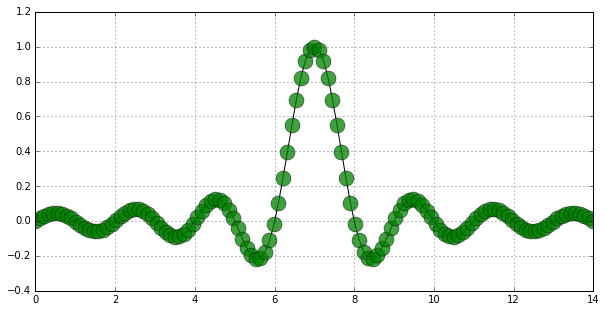

In [21]:
a   = 7.

# grafica referencia
p   = 1000
t   = np.linspace(-a,a,p)
t   = t+a
hht = sinc( alpha,beta,A,t-a )

# señal discreta en tiempo
sr  = 125.
dt  = np.linspace( -a,a,int(sr) )
dt  = dt+a
hdr = sinc( alpha,beta,A,dt-a )

plt.figure(figsize=(10,5))
plt.plot( t , hht,'k' )
plt.plot( dt, hdr,'og', markersize=15,alpha=.75)
plt.grid(True)
plt.show()

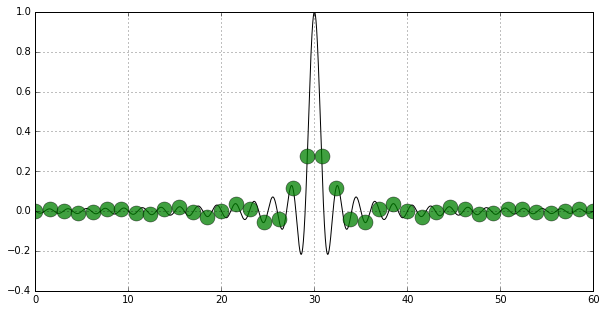

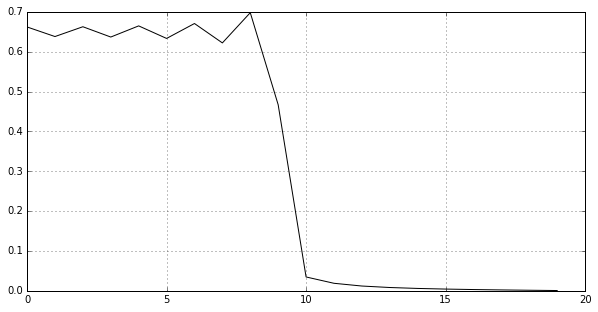

In [28]:
a     = 30.
alpha = np.pi
beta  = np.pi

# grafica referencia
p   = 10000
t   = np.linspace(-a,a,p)
t   = t+a
hht = sinc( alpha,beta,A,t-a )

# señal discreta en tiempo
sr  = 40.
dt  = np.linspace( -a,a,int(sr) )
dt  = dt+a
hdr = sinc( alpha,beta,A,dt-a )

# FFT
fft  = np.fft.fft(hdr)
fftM = np.abs( fft )
fftM = fftM[ :fftM.shape[0]/2 ]


plt.figure(figsize=(10,5))
plt.plot( t , hht,'k' )
plt.plot( dt, hdr,'og', markersize=15,alpha=.75)
plt.grid(True)

plt.figure(figsize=(10,5))
plt.plot( fftM,'k' )
plt.grid(True)
plt.show()

## Diseño de filtros FIR

La función *sinc* normalizada corresponde
$$ sinc_N(x) = \left\{\begin{matrix}
     \dfrac{sin( \pi x)}{\pi x}&:& x\neq0 \\
     1&:& x=0
  \end{matrix} \right .$$

In [29]:
N  = 20
M  = N+1
fc = 12.

sr = 80.
ft = fc/sr


In [33]:
n     = np.arange(M)
nsamp = n -M/2
print nsamp

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


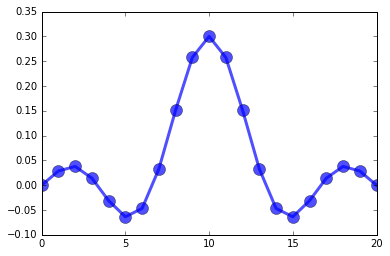

In [34]:
x           = np.sin( np.pi*2*ft*nsamp )
x[nsamp!=0] = x[nsamp!=0]/(np.pi*nsamp[nsamp!=0])
x[nsamp==0] = 2*ft

plt.plot(x,'-o',markersize=12,alpha=80,linewidth=3)
plt.show()

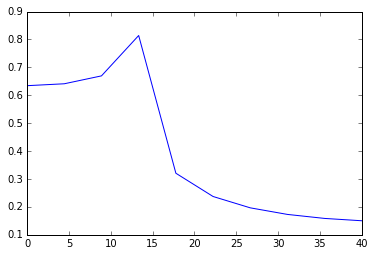

In [32]:
fft  = np.fft.fft(x)
fftM = np.abs( fft )
sh   = fftM.shape[0]/2
w    = np.linspace( 0,sr/2,fftM.shape[0]/2 )
fftM = fftM[ :sh ]

plt.plot(w,fftM)
plt.show()